In [128]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.subplots as sp
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import tensorflow as tf


Data Preprocessing 

In [129]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (160,160)
BATCH_SIZE = 512
SEED = 43
EPOCHS = 20
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

labels_dict = {class_name: label for label, class_name in train_generator.class_indices.items()}
print(labels_dict)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.
Found 42559 files belonging to 65 classes.
Using 8511 files for validation.
{0: '0', 1: '1', 2: '10', 3: '11', 4: '12', 5: '13', 6: '14', 7: '15', 8: '16', 9: '17', 10: '18', 11: '19', 12: '2', 13: '20', 14: '21', 15: '22', 16: '23', 17: '24', 18: '25', 19: '26', 20: '27', 21: '28', 22: '29', 23: '3', 24: '30', 25: '31', 26: '32', 27: '33', 28: '34', 29: '35', 30: '36', 31: '37', 32: '38', 33: '39', 34: '4', 35: '40', 36: '41', 37: '42', 38: '43', 39: '44', 40: '45', 41: '46', 42: '47', 43: '48', 44: '49', 45: '5', 46: '50', 47: '51', 48: '52', 49: '53', 50: '54', 51: '55', 52: '56', 53: '57', 54: '58', 55: '59', 56: '6', 57: '60', 58: '61', 59: '62', 60: '63', 61: '64', 62: '7', 63: '8', 64: '9'}


Data visualization

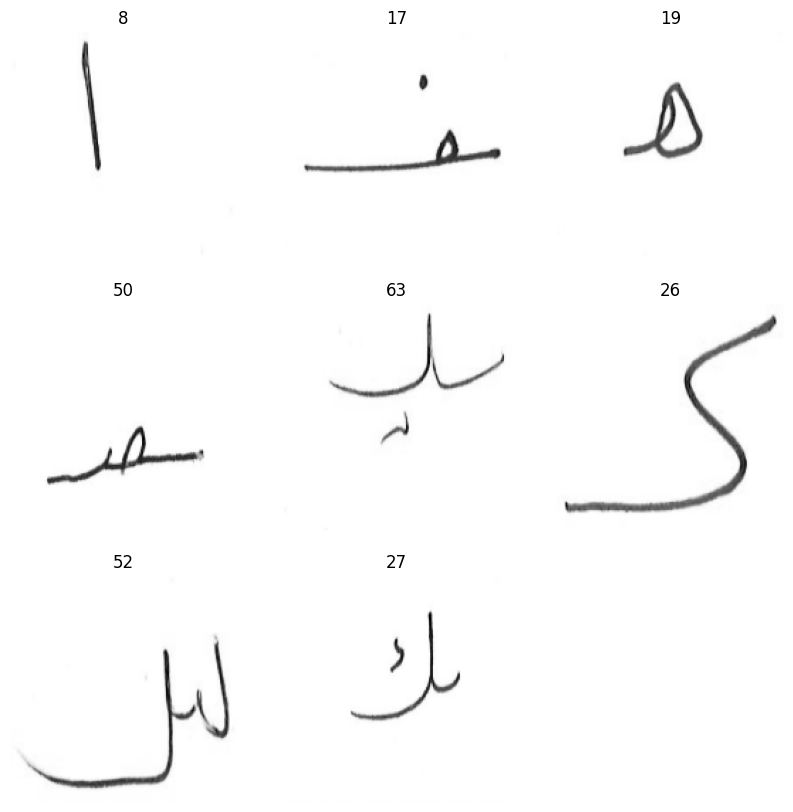

In [138]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): 
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [139]:
train_data_path = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train"
test_data_path = "/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test"


In [135]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu',
#                            kernel_regularizer=tf.keras.regularizers.l2(0.001)
                         ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)
])

model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (512, 160, 160, 1)        0         
                                                                 
 random_rotation_2 (RandomR  (512, 160, 160, 1)        0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (512, 160, 160, 1)        0         
                                                                 
 conv2d_22 (Conv2D)          (512, 160, 160, 32)       320       
                                                                 
 max_pooling2d_22 (MaxPooli  (512, 80, 80, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (512, 80, 80, 64)        

In [137]:
learning_rate = 0.001
lr_mod = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps=100000,\
                                                             decay_rate=0.96, staircase=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_mod), loss = 'categorical_crossentropy', metrics=['accuracy'])

h1 = model.fit(train_images,
              validation_data=train_validation,
              epochs=70)

Epoch 1/70
67/67 [==============================] - 30s 376ms/step - loss: 4.1587 - accuracy: 0.0178 - val_loss: 4.1659 - val_accuracy: 0.0524
Epoch 2/70
67/67 [==============================] - 28s 390ms/step - loss: 3.9587 - accuracy: 0.0585 - val_loss: 3.2949 - val_accuracy: 0.1734
Epoch 3/70
67/67 [==============================] - 27s 381ms/step - loss: 3.2006 - accuracy: 0.1833 - val_loss: 2.2704 - val_accuracy: 0.4010
Epoch 4/70
67/67 [==============================] - 27s 374ms/step - loss: 2.4049 - accuracy: 0.3455 - val_loss: 1.4688 - val_accuracy: 0.5931
Epoch 5/70
67/67 [==============================] - 27s 370ms/step - loss: 1.9617 - accuracy: 0.4450 - val_loss: 1.1526 - val_accuracy: 0.6502
Epoch 6/70
67/67 [==============================] - 26s 368ms/step - loss: 1.4360 - accuracy: 0.5727 - val_loss: 0.9075 - val_accuracy: 0.7253
Epoch 7/70
67/67 [==============================] - 27s 373ms/step - loss: 1.1850 - accuracy: 0.6419 - val_loss: 0.7793 - val_accuracy: 0.7563

In [140]:
test_images = tf.keras.utils.image_dataset_from_directory(
        datasets[1],
        labels=None,
        label_mode="categorical",
        color_mode='grayscale',
        shuffle=False,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


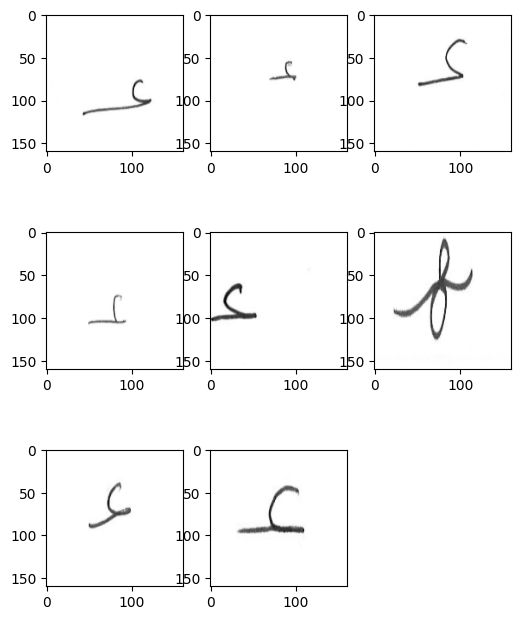

In [141]:
plt.figure(figsize=(6, 8))
for images in test_images.take(5): 
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)

Test Model

In [144]:
test_loss, test_acc = model.evaluate(train_validation, verbose=2)
print('InTest accuracy:', test_acc)

17/17 - 4s - loss: 0.3622 - accuracy: 0.9041 - 4s/epoch - 244ms/step
InTest accuracy: 0.9041240811347961


plot accuracy and lose curves

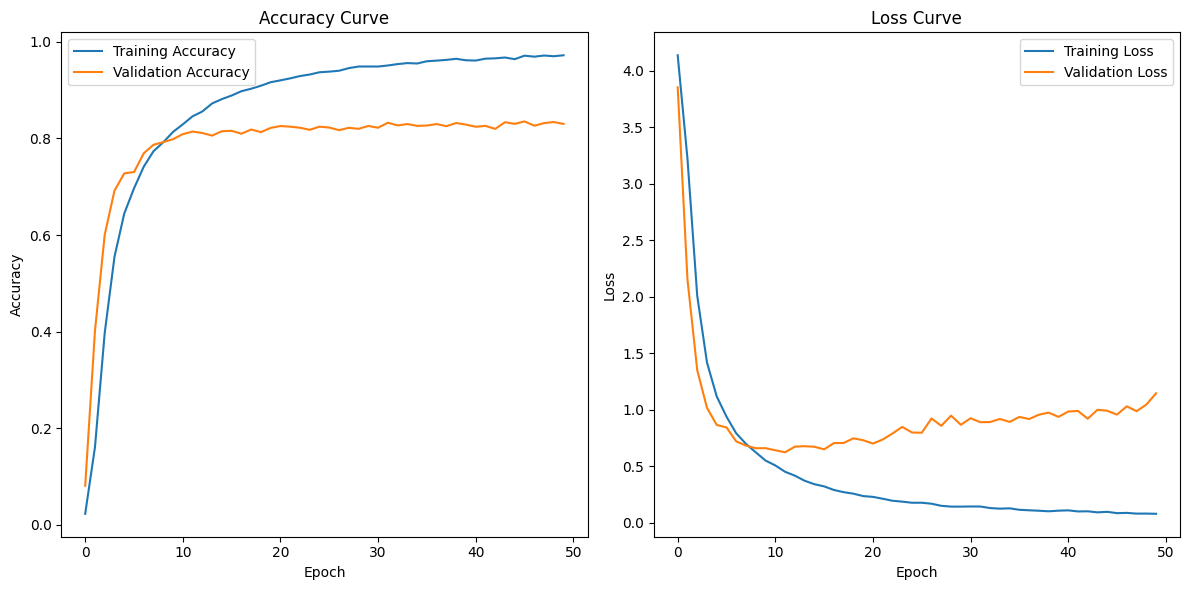

In [145]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [146]:
for images in test_images:
    print(images.shape)
    break

(512, 160, 160, 1)


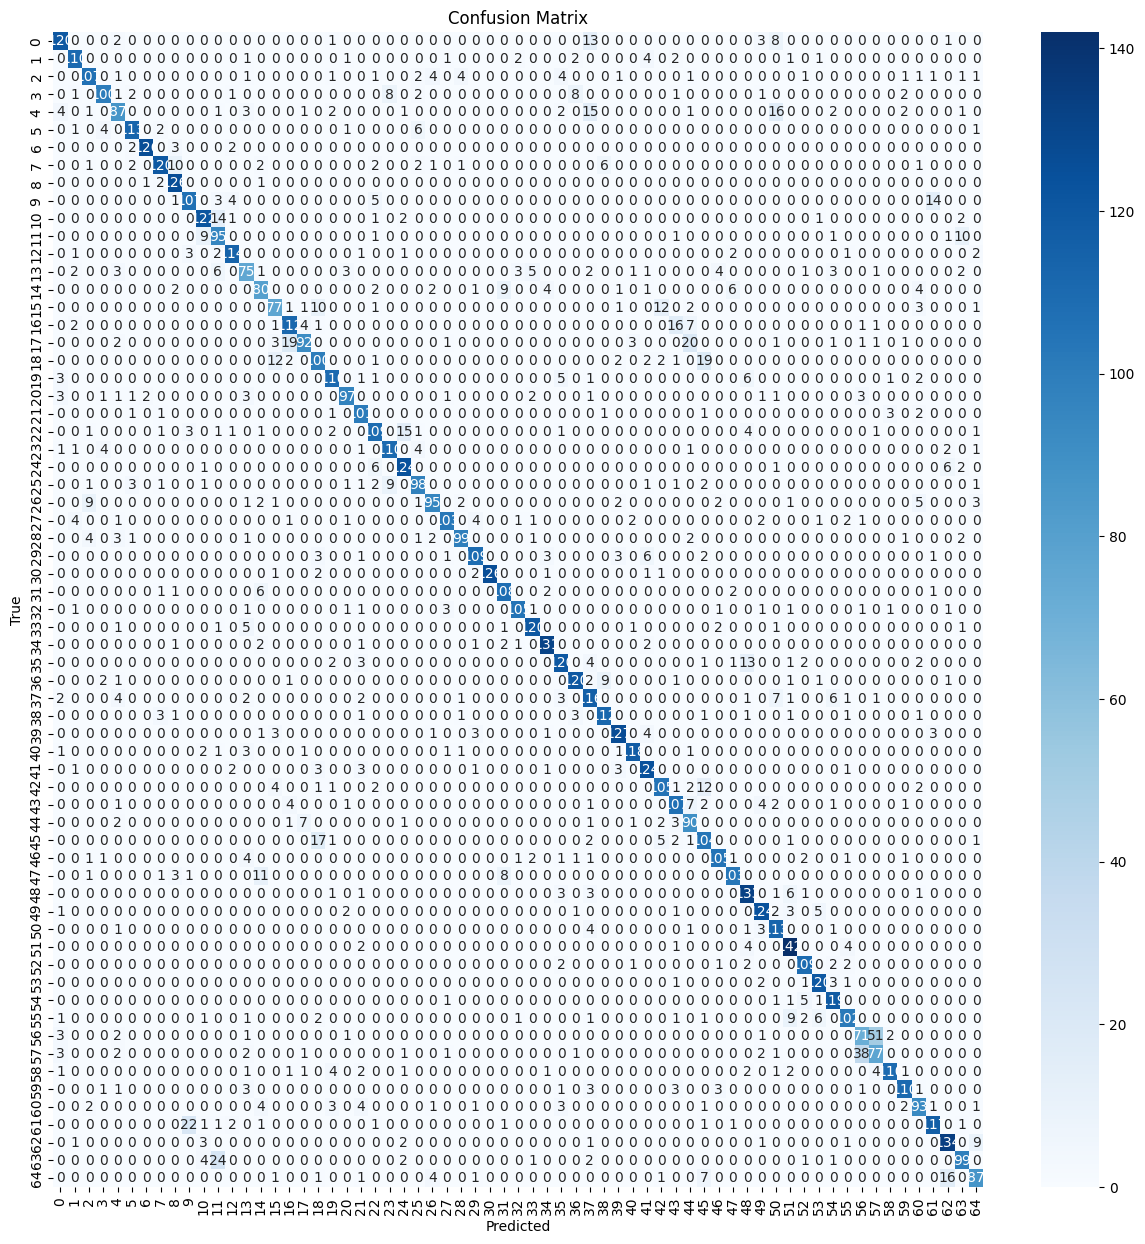

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       148
           1       0.88      0.88      0.88       125
           2       0.84      0.80      0.82       133
           3       0.88      0.79      0.83       127
           4       0.75      0.63      0.68       139
           5       0.90      0.88      0.89       128
           6       0.98      0.95      0.96       133
           7       0.91      0.81      0.86       148
           8       0.85      0.97      0.91       130
           9       0.79      0.80      0.79       134
          10       0.85      0.85      0.85       143
          11       0.64      0.81      0.71       118
          12       0.90      0.90      0.90       127
          13       0.69      0.66      0.68       113
          14       0.71      0.71      0.71       112
          15       0.75      0.71      0.73       109
          16       0.79      0.77      0.78       145
   

In [147]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

Save model

In [148]:
model.save('nn-arabic-handwriting-320210014.keras')

prediction 

In [149]:
predictions = model.predict(test_images)

21/21 [==============================] - 4s 185ms/step


In [152]:
img_list = os.listdir(datasets[1])

In [153]:
labels_list = sorted(os.listdir(datasets[0]))
print(labels_list)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [154]:
predictions[0][22]


0.99888915

In [155]:
predictions.shape

(10640, 65)

In [157]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))

predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(img_list)):
#     print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

Save a CSV file

In [158]:
  print(predictions_mod)

[22 22 22 ... 61 61 61]


In [159]:
df_predictions.head()

,ID,Label
0,0,29
0,1,29
0,10,29
0,100,29
0,1000,13


In [161]:
df_predictions.sort_values(by='ID', inplace=True)


In [162]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,29
1,1,29
2,2,29
3,3,29
4,4,29
...,...,...
10635,10635,9
10636,10636,9
10637,10637,9
10638,10638,9


In [164]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 